In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rect_window(x, w):
    return int(x < w)*int(x>-w)

def hamming(x, w):
    return (0.53836+0.46164*np.cos(np.pi*x/w))*rect_window(x, w)

rw = np.vectorize(rect_window)
hw = np.vectorize(hamming)

def _create_cfar_window( training_cells, guard_cells):
    """Returns a list containing the cfar window."""
    win_aux = [
            *[1] * training_cells,
            *[0] * (2 * guard_cells + 1),
            *[1] * training_cells
        ]
    return win_aux

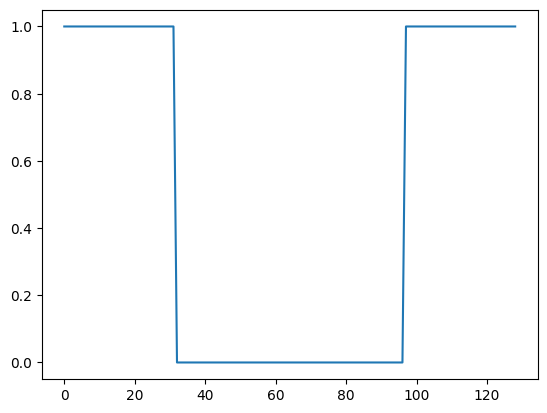

In [3]:
window_size = 129


In [3]:
nfft_aux = 3748.0

print(2 ** (int(np.log2(nfft_aux)) + 1))

4096


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


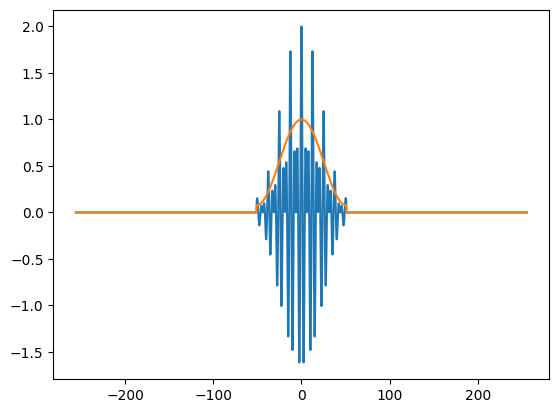

In [4]:
L = 512
x = np.arange(-L//2, L//2, 0.25)

a = 0
W = hw(x-a, L//10)
signal = (np.exp(-1j*(x-a))+np.exp(-1j*(x-a)*1.5))*W

plt.plot(x, signal)
plt.plot(x, W)


In [5]:
signal.shape, 2**12

((2048,), 4096)

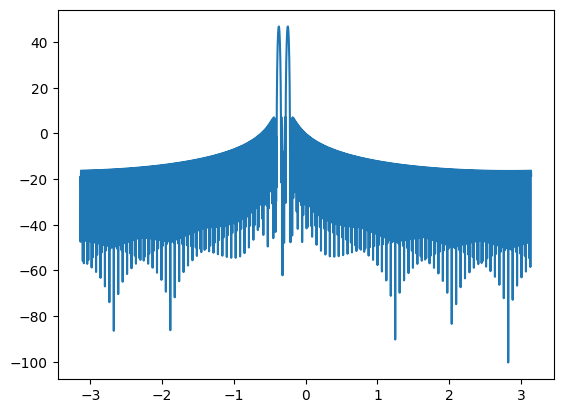

In [14]:
K = 2**14
fft = np.fft.fft(signal, n=K)

sq_fft = 10*np.log10(fft*np.conj(fft))

plt.plot(np.linspace(-np.pi, np.pi, K), np.fft.fftshift(sq_fft))


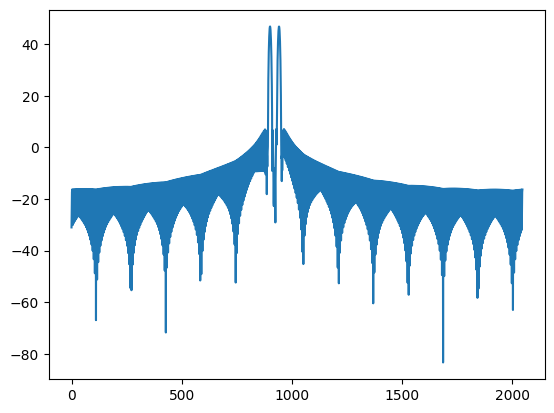

In [16]:
K = 2**11
fft = np.fft.fft(signal, n=K)
sq_fft = 10*np.log10(fft*np.conj(fft))
plt.plot(np.concatenate((sq_fft[K-signal.shape[0]//2+1:], sq_fft[:signal.shape[0]//2])))


In [125]:
def peak(x, a):
    return np.exp(-x/a)

In [204]:
L = 1024
n = 50
x = np.arange(n)
w = 4

np.random.seed(5)
#sample_peak = np.hstack([np.zeros_like(x), peak(x, w)])
sample_peak = peak(x, w)

signal = np.zeros(L, dtype=np.float64)

pos = np.random.randint(0, high=L, size=(8,))

for i in pos:
    if L-i > n:
        signal[i:i+n]+=peak(x,w)

s_noise = signal+np.random.normal(scale=0.1, size=(L,))

(1024,) (1024,)


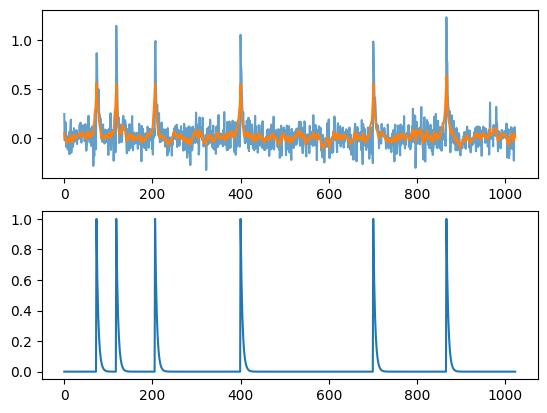

In [216]:
filtered = np.convolve(sample_peak[::-1], s_noise, mode='full')[len(sample_peak)-1:]/np.sum(sample_peak)

fig = plt.figure()
ax = fig.add_subplot(211)
ax2 =fig.add_subplot(212)


ax.plot(s_noise, alpha=0.7)
ax.plot(filtered)

ax2.plot(signal)

print(filtered.shape, signal.shape)

(1024,) (1024,)


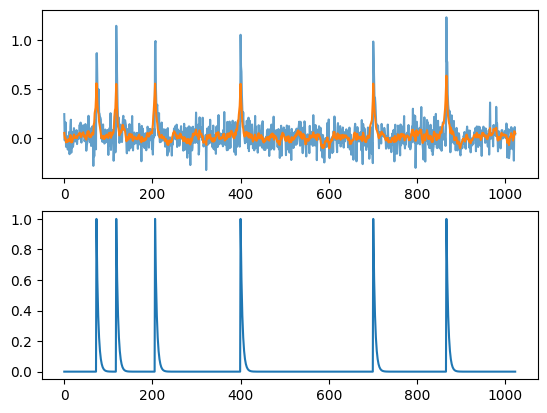

In [218]:
#plt.plot(s_noise)
filtered_fft = np.fft.fft(s_noise)*np.fft.fft(sample_peak, n=len(s_noise)).conj()

filtered = np.fft.ifft(filtered_fft, n=len(s_noise)).real/np.sum(sample_peak)

fig = plt.figure()
ax = fig.add_subplot(211)
ax2 =fig.add_subplot(212)

ax.plot(s_noise, alpha=0.7)
ax.plot(filtered)

ax2.plot(signal)

print(filtered.shape, signal.shape)

In [219]:
sq_filtered = filtered*filtered.conj()

In [220]:
w = _create_cfar_window(10, 10)

In [221]:
N = sq_filtered.shape[0]
W = len(w)
L = (W-1)//2

filt_cf = np.empty((N+2*L))
filt_cf[:L] = sq_filtered[L+1:W]
filt_cf[L:L+N] = sq_filtered 
filt_cf[L+N:] = sq_filtered[N-W:N-L-1]


In [280]:
K = N+2*L
cfar = np.real(np.fft.ifft((np.fft.fft(filt_cf, n=K)*np.fft.fft(w, n=K))))

In [281]:
cfar.shape, N, W, L, N+2*L

((1064,), 1024, 41, 20, 1064)

In [282]:
treshold = cfar*(0.001**(-1/np.sum(w))-1)

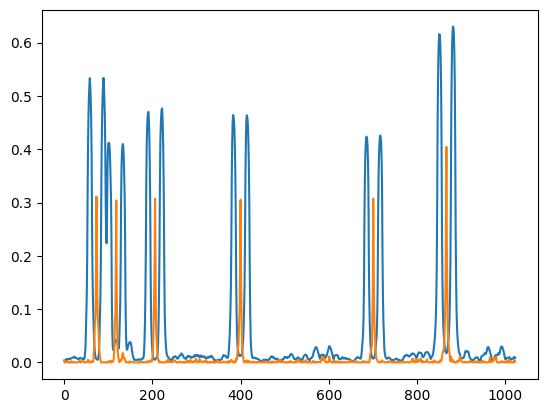

In [284]:
plt.plot(treshold[W-1:])
plt.plot(sq_filtered)

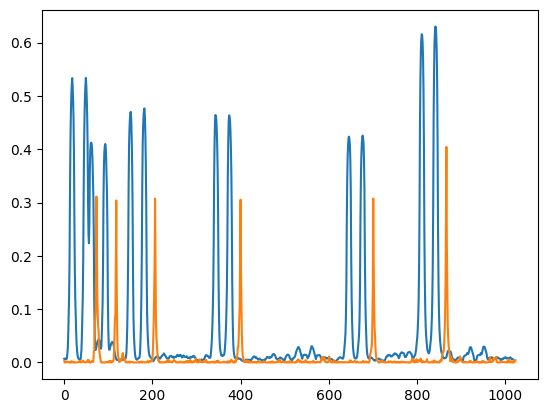

In [270]:
plt.plot(treshold[W-1:N+W-1])
plt.plot(sq_filtered)

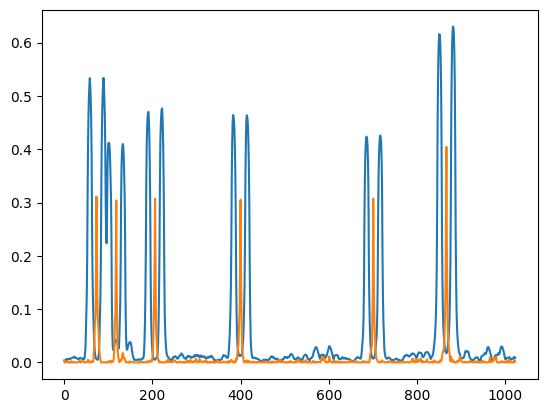

In [271]:
plt.plot(treshold[:-W+1])
plt.plot(sq_filtered)


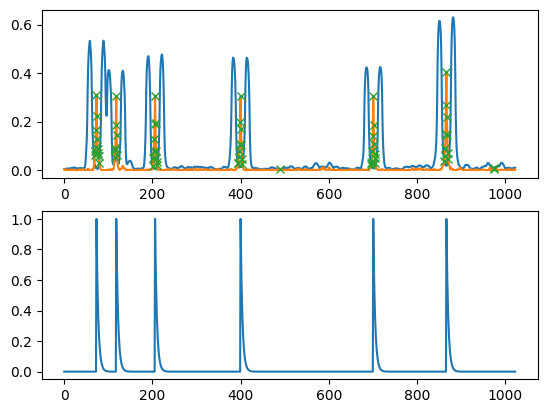

In [272]:
S1 = treshold[:-W+1]
S2 = sq_filtered

fig = plt.figure()
ax = fig.add_subplot(211)
ax2 =fig.add_subplot(212)
ax.plot(S1)
ax.plot(S2)

arg = np.argwhere(S2>S1).flatten()
ax.plot(arg, S2[arg], 'x')

ax2.plot(signal)

In [234]:
con_cfar = np.convolve(w, filt_cf, mode='full')*(0.001**(-1/np.sum(w))-1)

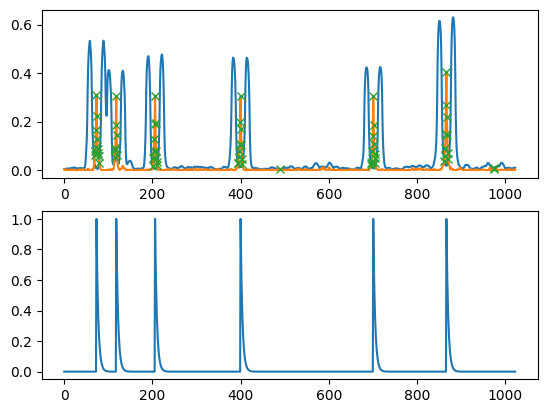

In [238]:
S1 = con_cfar[W-1:N+W-1]
S2 = sq_filtered

fig = plt.figure()
ax = fig.add_subplot(211)
ax2 =fig.add_subplot(212)
ax.plot(S1)
ax.plot(S2)

arg = np.argwhere(S2>S1).flatten()
ax.plot(arg, S2[arg], 'x')

ax2.plot(signal)

In [40]:
a = np.load('normal_propagation_3.npy', allow_pickle=True)

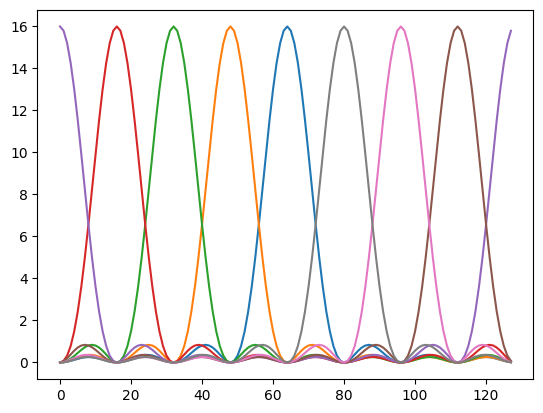

In [58]:
for i in a:
    plt.plot(np.abs(np.fft.fftshift(np.fft.fft(i, n=128)))**2)

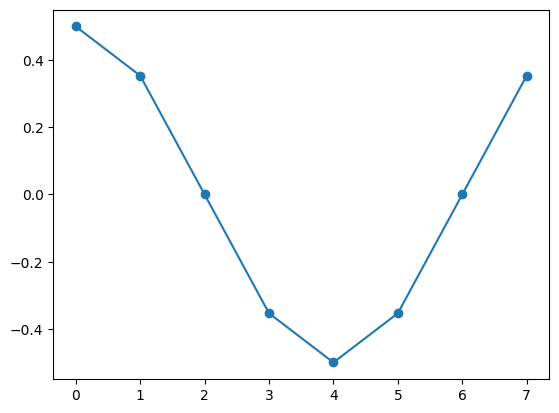

In [57]:
plt.plot(a[7].real, 'o-')

In [246]:
b = np.random.randint(0,2, size=(10, 8, 100))

In [247]:
b

array([[[0, 0, 0, ..., 1, 0, 0],
        [0, 1, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 1, 0, 1],
        ...,
        [1, 1, 1, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 1, 1, ..., 0, 1, 0],
        [0, 0, 1, ..., 1, 0, 1],
        [1, 0, 0, ..., 1, 1, 1],
        ...,
        [0, 1, 0, ..., 0, 1, 1],
        [1, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 0]],

       [[1, 1, 1, ..., 1, 0, 0],
        [0, 1, 1, ..., 1, 0, 1],
        [0, 1, 0, ..., 1, 1, 1],
        ...,
        [1, 0, 0, ..., 0, 1, 0],
        [0, 1, 1, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 0, 0]],

       ...,

       [[0, 1, 0, ..., 1, 1, 1],
        [0, 1, 0, ..., 1, 0, 0],
        [1, 1, 1, ..., 0, 1, 0],
        ...,
        [1, 0, 1, ..., 1, 0, 1],
        [1, 1, 1, ..., 1, 0, 0],
        [1, 0, 1, ..., 1, 0, 0]],

       [[1, 0, 1, ..., 1, 1, 1],
        [0, 1, 0, ..., 1, 0, 1],
        [0, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 0, 1, ..., 

In [249]:
det = b>0

In [288]:
d2d = det.any(axis=1)

In [291]:
dc = d2d.cumsum(axis=1)

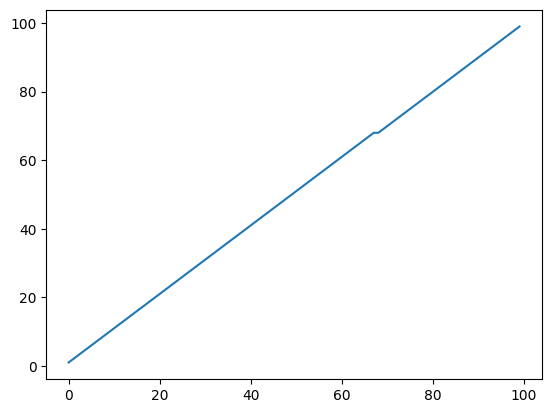

In [293]:
plt.plot(dc[2])

In [6]:
N = 128
a = np.arange(N)
b = np.array([a, -a], dtype=np.float32).T.ravel()

In [10]:
data_size = N
data_seq = (np.array([np.arange(data_size), -np.arange(data_size)],
                      dtype=np.float32).T.ravel()).view(np.complex64)

In [11]:
data_seq

array([  0.  +0.j,   1.  -1.j,   2.  -2.j,   3.  -3.j,   4.  -4.j,
         5.  -5.j,   6.  -6.j,   7.  -7.j,   8.  -8.j,   9.  -9.j,
        10. -10.j,  11. -11.j,  12. -12.j,  13. -13.j,  14. -14.j,
        15. -15.j,  16. -16.j,  17. -17.j,  18. -18.j,  19. -19.j,
        20. -20.j,  21. -21.j,  22. -22.j,  23. -23.j,  24. -24.j,
        25. -25.j,  26. -26.j,  27. -27.j,  28. -28.j,  29. -29.j,
        30. -30.j,  31. -31.j,  32. -32.j,  33. -33.j,  34. -34.j,
        35. -35.j,  36. -36.j,  37. -37.j,  38. -38.j,  39. -39.j,
        40. -40.j,  41. -41.j,  42. -42.j,  43. -43.j,  44. -44.j,
        45. -45.j,  46. -46.j,  47. -47.j,  48. -48.j,  49. -49.j,
        50. -50.j,  51. -51.j,  52. -52.j,  53. -53.j,  54. -54.j,
        55. -55.j,  56. -56.j,  57. -57.j,  58. -58.j,  59. -59.j,
        60. -60.j,  61. -61.j,  62. -62.j,  63. -63.j,  64. -64.j,
        65. -65.j,  66. -66.j,  67. -67.j,  68. -68.j,  69. -69.j,
        70. -70.j,  71. -71.j,  72. -72.j,  73. -73.j,  74. -7

In [16]:
print(np.float32.itemsize)

<attribute 'itemsize' of 'numpy.generic' objects>
